# Chemical/Phase Equilibria

This recitation presents a solution to Assignment 04 from the Unit 02 assignment.

## Topics Covered

1. Unit 02 - Assignment 04 (Chemical and Phase Equilibrium; for loops)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

## Example Problem

### Problem Statement, Rawlings and Ekerdt

Consider the gas-phase reaction

$$\textrm{A + B} \rightleftharpoons \textrm{C}$$

Product C has a fairly low vapor pressure, so we are concerned about the formation of a liquid phase in the reactor. The Clausius-Clapeyron equation gives the vapor pressure of component C in units of bar as a function of temperature.

$$\ln {P_C}^{\circ} = c - \frac {\Delta H_{vap}}{RT}$$

The reactor is initially filled with an equimolar mixture of A and B. The equilibrium constant at T = 298K is K = 9, the reaction is exothermic with $\Delta H^{\circ} = -11$ kcal/mol, and the system pressure is P = 1.5 bar. Components A and B are not very soluble in liquid C, so you can assume that if a liquid phase forms, it is pure species C (A and B do not condense). The heat of vaporization of component C is $\Delta {H_{\text{vap}}} = 6$ kcal/mol, and the value of the Clausius-Clapeyron contant is c = 9.53.

### Part 1

Over what temperature range does the reactor contain a liquid phase?

#### Solution Part 1a:

Calculate the equilibrium partial pressures for all species at 298K and 1.5 bar.

In [2]:
def obj1a(ex):
    NA0 = 1.0 #mole
    NB0 = 1.0 #mole
    NC0 = 0.0 #moles
    T   = 298 #K
    P   = 1.5 #bar
    P0  = 1.0 #bar
    
    NA  = NA0 - ex #moles
    NB  = NB0 - ex #moles
    NC  = NC0 + ex #moles
    NT  = NA + NB + NC
    
    yA  = NA/NT
    yB  = NB/NT
    yC  = NC/NT
    
    aA  = yA*P/P0
    aB  = yB*P/P0
    aC  = yC*P/P0
    
    KTHERMO = 9
    KACTIVITY = aC/aA/aB
    OBJECTIVE = KTHERMO - KACTIVITY
    return OBJECTIVE

In [3]:
ans, info = opt.newton(obj1a, 0.5, full_output = 'True')

#Workup
NA0 = 1.0 #mole
NB0 = 1.0 #mole
NC0 = 0.0 #moles
P   = 1.5 #bar

NA  = NA0 - ans #moles
NB  = NB0 - ans #moles
NC  = NC0 + ans #moles
NT  = NA + NB + NC

yA  = NA/NT
yB  = NB/NT
yC  = NC/NT

pA  = yA*P
pB  = yB*P
pC  = yC*P

print(f'The pressures of A, B, and C are {pA:0.3f}, {pB:0.3f}, {pC:0.3f} in bar')

The pressures of A, B, and C are 0.312, 0.312, 0.876 in bar


#### Solution Part 1b

Calculate the equilibrium partial pressures for all species at 400K and 1.5 bar.

In [4]:
def obj1b(ex):
    NA0 = 1.0 #mole
    NB0 = 1.0 #mole
    NC0 = 0.0 #moles
    T0  = 298 #K
    T   = 400 #K
    P   = 1.5 #bar
    P0  = 1.0 #bar
    DH0 = -11.0 #kcal/mol
    R   = 1.987e-3 #kcal/mol/K

    NA  = NA0 - ex #moles
    NB  = NB0 - ex #moles
    NC  = NC0 + ex #moles
    NT  = NA + NB + NC

    yA  = NA/NT
    yB  = NB/NT
    yC  = NC/NT

    aA  = yA*P/P0
    aB  = yB*P/P0
    aC  = yC*P/P0

    K0 = 9
    KTHERMO   = K0*np.exp(-DH0/R*(1/T - 1/T0))
    KACTIVITY = aC/aA/aB
    OBJECTIVE = KTHERMO - KACTIVITY
    return OBJECTIVE

In [5]:
ans, info = opt.newton(obj1b, 0.5, full_output = 'True')

#Workup
NA0 = 1.0 #mole
NB0 = 1.0 #mole
NC0 = 0.0 #moles
P   = 1.5 #bar

NA  = NA0 - ans #moles
NB  = NB0 - ans #moles
NC  = NC0 + ans #moles
NT  = NA + NB + NC

yA  = NA/NT
yB  = NB/NT
yC  = NC/NT

pA  = yA*P
pB  = yB*P
pC  = yC*P

print(f'The pressures of A, B, and C are {pA:0.3f}, {pB:0.3f}, {pC:0.3f} in bar')

The pressures of A, B, and C are 0.729, 0.729, 0.042 in bar


#### Solution Part 1c:

Now make that general so we can easily adapt to solve for any temperature...

In [6]:
def temp(ex, T):
    NA0 = 1.0 #mole
    NB0 = 1.0 #mole
    NC0 = 0.0 #moles
    T0  = 298 #K
    #T   = 400 #K
    P   = 1.5 #bar
    P0  = 1.0 #bar
    DH0 = -11.0 #kcal/mol
    R   = 1.987e-3 #kcal/mol/K

    NA  = NA0 - ex #moles
    NB  = NB0 - ex #moles
    NC  = NC0 + ex #moles
    NT  = NA + NB + NC

    yA  = NA/NT
    yB  = NB/NT
    yC  = NC/NT

    aA  = yA*P/P0
    aB  = yB*P/P0
    aC  = yC*P/P0

    K0 = 9
    KTHERMO   = K0*np.exp(-DH0/R*(1/T - 1/T0))
    KACTIVITY = aC/aA/aB
    OBJECTIVE = KTHERMO - KACTIVITY
    return OBJECTIVE

In [7]:
Tval = 400 #K
obj1c = lambda ex: temp(ex, Tval)
ans, info = opt.newton(obj1c, 0.5, full_output = True)

#### Solution Part 1d

Now we're ready to solve the actual problem.  We'll start by solving for the equilibrium partial pressure of species C for a large set of temperatures.  We'll use a for loop to run `opt.newton` or `opt.brent` many times...

In [8]:
Tset   = np.linspace(200, 400, 100)
pCout1 = np.zeros(len(Tset))

for i in range(0, len(Tset)):
    Tval  = Tset[i]
    obj1d = lambda ex: temp(ex, Tval)
    ans, info = opt.newton(obj1d, 0.999, full_output = True)
    if info.converged == False:
        print('Solver failed to Converge')
        break

    #Workup
    NA0 = 1.0 #mole
    NB0 = 1.0 #mole
    NC0 = 0.0 #moles
    P   = 1.5 #bar

    NA  = NA0 - ans #moles
    NB  = NB0 - ans #moles
    NC  = NC0 + ans #moles
    NT  = NA + NB + NC

    yA  = NA/NT
    yB  = NB/NT
    yC  = NC/NT

    pA  = yA*P
    pB  = yB*P
    pC  = yC*P

    pCout1[i] = pC

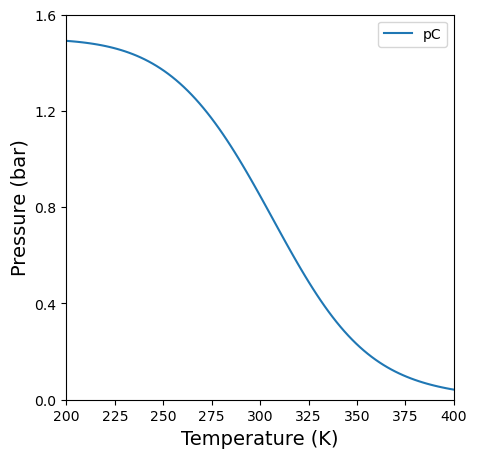

In [9]:
plt.figure(1, figsize = (5,5))
plt.plot(Tset, pCout1, label = 'pC')
plt.ylim(0, 1.6)
plt.yticks(np.arange(0, 1.61, 0.4))
plt.xlim(Tset[0], Tset[-1])
plt.ylabel('Pressure (bar)', fontsize = 14)
plt.xlabel('Temperature (K)', fontsize = 14)
plt.legend()
plt.show()

#### Solution Part 1e

Now let's compare that to the vapor pressure of species C, which we can evaluate directly from the Clausius-Clapeyron Equation.

Product C has a fairly low vapor pressure, so we are concerned about the formation of a liquid phase in the reactor. The Clausius-Clapeyron equation gives the vapor pressure of component C in units of bar as a function of temperature.

$$\ln {P_C}^{\circ} = c - \frac {\Delta H_{vap}}{RT}$$

The reactor is initially filled with an equimolar mixture of A and B. The equilibrium constant at T = 298K is K = 9, the reaction is exothermic with $\Delta H^{\circ} = -11$ kcal/mol, and the system pressure is P = 1.5 bar. Components A and B are not very soluble in liquid C, so you can assume that if a liquid phase forms, it is pure species C (A and B do not condense). The heat of vaporization of component C is $\Delta {H_{\text{vap}}} = 6$ kcal/mol, and the value of the Clausius-Clapeyron contant is c = 9.53.

In [10]:
def pCsat(T):
    c = 9.53
    DHvap = 6 #kcal/mol
    R = 1.987e-3 #kcal/mol/K
    return np.exp(c - DHvap/R/T)

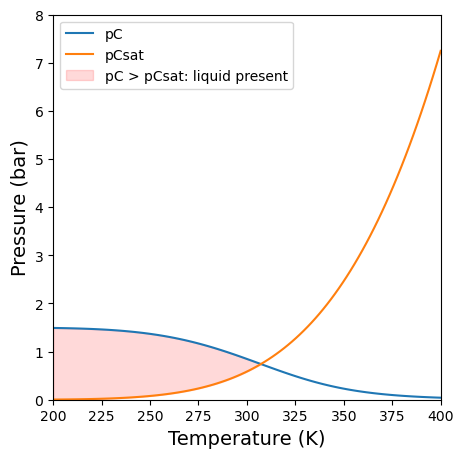

In [11]:
plt.figure(1, figsize = (5,5))
plt.plot(Tset, pCout1, label = 'pC')
plt.plot(Tset, pCsat(Tset), label = 'pCsat')
plt.ylim(0, 8)
plt.yticks(np.arange(0, 8.1, 1))
plt.xlim(Tset[0], Tset[-1])
plt.ylabel('Pressure (bar)', fontsize = 14)
plt.xlabel('Temperature (K)', fontsize = 14)
plt.fill_between(Tset, pCout1, pCsat(Tset), where = pCout1 >= pCsat(Tset), interpolate = True, color = 'red', alpha = 0.15, label = 'pC > pCsat: liquid present')
plt.legend(loc = 'upper left')
plt.show()

#### Finding the transition temperature

If you want to solve for the exact temperature where the two curves intersect, there are many ways you can probably do it.  Below, I show a modification to our objective function so that it takes two unknowns (ex and Temperature) in a vector argument (var).  You'll note that I added a second constraint equation to the equilibrium problem, which is that pC = pCsat.  This will solve for the intersection temperature in the figure above (and the extent at that temperature).

In [12]:
def obj1e(var):
    ex = var[0]
    T  = var[1]

    NA0 = 1.0 #mole
    NB0 = 1.0 #mole
    NC0 = 0.0 #moles
    T0  = 298 #K
    #T   = 400 #K
    P   = 1.5 #bar
    P0  = 1.0 #bar
    DH0 = -11.0 #kcal/mol
    R   = 1.987e-3 #kcal/mol/K

    NA  = NA0 - ex #moles
    NB  = NB0 - ex #moles
    NC  = NC0 + ex #moles
    NT  = NA + NB + NC

    yA  = NA/NT
    yB  = NB/NT
    yC  = NC/NT

    PC  = yC*P

    aA  = yA*P/P0
    aB  = yB*P/P0
    aC  = yC*P/P0

    K0 = 9
    KTHERMO   = K0*np.exp(-DH0/R*(1/T - 1/T0))
    KACTIVITY = aC/aA/aB
    OBJECTIVE1 = KTHERMO - KACTIVITY
    OBJECTIVE2 = PC - pCsat(T)
    return [OBJECTIVE1, OBJECTIVE2]

In [13]:
opt.root(obj1e, [0.5, 300])

 message: The solution converged.
 success: True
  status: 1
     fun: [ 1.116e-10 -1.676e-12]
       x: [ 6.616e-01  3.072e+02]
    nfev: 11
    fjac: [[-9.954e-01  9.570e-02]
           [-9.570e-02 -9.954e-01]]
       r: [ 1.434e+01  7.906e-01  9.240e-02]
     qtf: [-6.029e-08 -4.884e-09]

Basically, above 307.2K, there is no liquid phase.  Below 307.2K, there is a liquid phase.

**Problem 2**

If the reaction is endothermic with $\Delta H^{\circ} = 11$ kcal/mol, over what temperature range does the reactor contain a liquid phase?

In [14]:
def temp2(ex, T):
    NA0 = 1.0 #mole
    NB0 = 1.0 #mole
    NC0 = 0.0 #moles
    T0  = 298 #K
    #T   = 400 #K
    P   = 1.5 #bar
    P0  = 1.0 #bar
    DH0 = 11.0 #kcal/mol
    R   = 1.987e-3 #kcal/mol/K

    NA  = NA0 - ex #moles
    NB  = NB0 - ex #moles
    NC  = NC0 + ex #moles
    NT  = NA + NB + NC

    yA  = NA/NT
    yB  = NB/NT
    yC  = NC/NT

    aA  = yA*P/P0
    aB  = yB*P/P0
    aC  = yC*P/P0

    K0 = 9
    KTHERMO   = K0*np.exp(-DH0/R*(1/T - 1/T0))
    KACTIVITY = aC/aA/aB
    OBJECTIVE = KTHERMO - KACTIVITY
    return OBJECTIVE

In [15]:
Tset   = np.linspace(200, 400, 100)
pCout2 = np.zeros(len(Tset))

for i in range(0, len(Tset)):
    Tval  = Tset[i]
    obj2a = lambda ex: temp2(ex, Tval)
    ans, info = opt.newton(obj2a, 0.999, full_output = True)
    if info.converged == False:
        print('Solver failed to Converge')
        break

    #Workup
    NA0 = 1.0 #mole
    NB0 = 1.0 #mole
    NC0 = 0.0 #moles
    P   = 1.5 #bar

    NA  = NA0 - ans #moles
    NB  = NB0 - ans #moles
    NC  = NC0 + ans #moles
    NT  = NA + NB + NC

    yA  = NA/NT
    yB  = NB/NT
    yC  = NC/NT

    pA  = yA*P
    pB  = yB*P
    pC  = yC*P

    pCout2[i] = pC

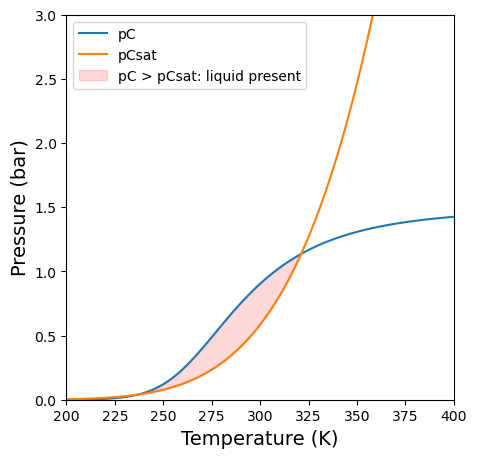

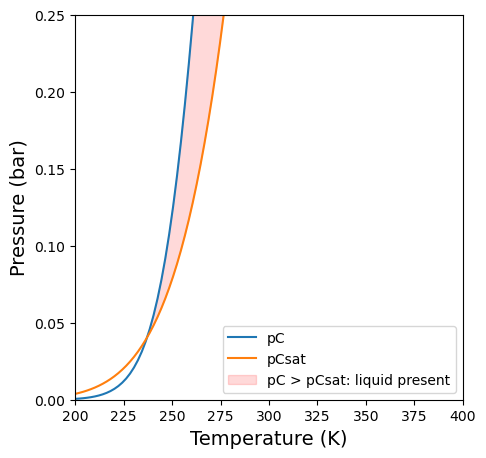

In [16]:
plt.figure(1, figsize = (5,5))
plt.plot(Tset, pCout2, label = 'pC')
plt.plot(Tset, pCsat(Tset), label = 'pCsat')
plt.ylim(0, 3)
plt.yticks(np.arange(0, 3.1, 0.5))
plt.xlim(Tset[0], Tset[-1])
plt.ylabel('Pressure (bar)', fontsize = 14)
plt.xlabel('Temperature (K)', fontsize = 14)
plt.fill_between(Tset, pCout2, pCsat(Tset), where = pCout2 >= pCsat(Tset), interpolate = True, color = 'red', alpha = 0.15, label = 'pC > pCsat: liquid present')
plt.legend(loc = 'upper left')
plt.show()

plt.figure(2, figsize = (5,5))
plt.plot(Tset, pCout2, label = 'pC')
plt.plot(Tset, pCsat(Tset), label = 'pCsat')
plt.ylim(0, 0.25)
plt.yticks(np.arange(0, 0.26, 0.05))
plt.xlim(Tset[0], Tset[-1])
plt.ylabel('Pressure (bar)', fontsize = 14)
plt.xlabel('Temperature (K)', fontsize = 14)
plt.fill_between(Tset, pCout2, pCsat(Tset), where = pCout2 >= pCsat(Tset), interpolate = True, color = 'red', alpha = 0.15, label = 'pC > pCsat: liquid present')
plt.legend(loc = 'lower right')
plt.show()

In [17]:
def obj2b(var):
    ex = var[0]
    T  = var[1]

    NA0 = 1.0 #mole
    NB0 = 1.0 #mole
    NC0 = 0.0 #moles
    T0  = 298 #K
    #T   = 400 #K
    P   = 1.5 #bar
    P0  = 1.0 #bar
    DH0 = 11.0 #kcal/mol
    R   = 1.987e-3 #kcal/mol/K

    NA  = NA0 - ex #moles
    NB  = NB0 - ex #moles
    NC  = NC0 + ex #moles
    NT  = NA + NB + NC

    yA  = NA/NT
    yB  = NB/NT
    yC  = NC/NT

    PC  = yC*P

    aA  = yA*P/P0
    aB  = yB*P/P0
    aC  = yC*P/P0

    K0 = 9
    KTHERMO   = K0*np.exp(-DH0/R*(1/T - 1/T0))
    KACTIVITY = aC/aA/aB
    OBJECTIVE1 = KTHERMO - KACTIVITY
    OBJECTIVE2 = PC - pCsat(T)
    return [OBJECTIVE1, OBJECTIVE2]

In [18]:
opt.root(obj2b, [0.2, 230])

 message: The solution converged.
 success: True
  status: 1
     fun: [ 6.880e-12 -9.287e-13]
       x: [ 5.255e-02  2.371e+02]
    nfev: 20
    fjac: [[-9.210e-01  3.897e-01]
           [-3.897e-01 -9.210e-01]]
       r: [ 2.183e+00 -8.584e-03 -1.144e-03]
     qtf: [-4.786e-09 -1.260e-09]

There is a liquid phase present between 237.1K and 321.2K.  In this region, pC > pCsat, so there will be condensation.